Olivia Horjamo

Emil Amnell

Hugo Holmqvist

# Electricity price prediction project for Introduction to Data Science - Technical report

Questions:
- what worked?
- What didn't (and why)?
- What changes did you have to make from your initial plan and why?
- What would you have done differently now? What would possible future steps be?

## Short description of the project: A web application to show predictions of electricity prices

We chose electricity price prediction as a topic for our project, because of its pressing importance in this era of high inflation and possible energy crisis. We wanted to make a software that could help anyone with worries about their personal budget by showing them predictions of electricity prices the next winter.

## Data: n explanatory variables for the past 7 years

After deciding the topic of our project, the next step was to think about the data collection process. The goal is to have one dataframe with hourly data for the selected variables for as long a period as possible.

We started by determining the data required in this project. After listing variables that might be useful in explaining the electricity prices we ended up with the following preliminatory three categories of variables: weather, generation and demand of electricity and prices of supplementary goods. In the end, we had 12 variables of weather, 13 variables of electricity generation and one for electricity demand in Finland and, in addition, we added the price of crude oil in Europe as a supplementary good.

The variable we are trying to predict is the Day-ahead price of electricity in Finland.

Finding reliable data of the variables was surprisingly difficult, but we ended up collecting data from three different sources: _[The Finnish Meteorological Insititute](https://en.ilmatieteenlaitos.fi/open-data)_ for the weather data, _[U.S. Energy Information Administration](https://www.eia.gov/dnav/pet/hist/RBRTED.htm)_ for the price of crude oil and _[entsoe](https://transparency.entsoe.eu/) (Central collection and publication of electricity generation, transportation and consumption data and information for the pan-European market_ for the price, load and generation of electricity in Finland.

### Data collection

To collect weather data from Kumpula weather observation station we created a Python script that queried the Finnish Meteorological Institute API. The other sources didn't have an API so we had to download the data manually in csv and xls -formats. 

For price, load and generation of electricity, we were able to collect hourly data for the last seven years. For weather data we were able to collect hourly data for the last 12 years. For the price of crude oil, we could find daily data from 1986 to 2022.

### Data preprocessing

We started by merging all data into one dataframe. Since the data on the price of crude oil was in daily units and other data was in hourly units, we used the daily crude oil price for each hour.

We started by plotting the series to determine if there seem to be some outliers and that didn't seem to be the case. However, when plotting the series we noticed that there is no data on air temperature for multiple months in 2018. We decided to solve the issue by filling the missing values with observations in Kaisaniemi weather station, which is close to Kumpula.

After this imputation, the number of missing values per column ranged between 24 and 821 out of the 37 240 rows. Since values were not missing systematically, we decided to drop rows with missing values completely. The number of observation drops by 1200 observations.

## Exploratory data analysis: Trends and correlations

In this section we will show some graphics of the variables. In addition to the plots shown here, we also calculated some summary statistics of the variables (standard deviation, mean, median, minimum and maximum) to understand the data better.

### Trends

To observe trends in data, we aggregated the hourly data to daily frequency. In addition, we calculated a new variable _total_generation_ to plot figures of the total generation of electricity in Finland.

It is important to understand the trends in data when trying to predict future values.

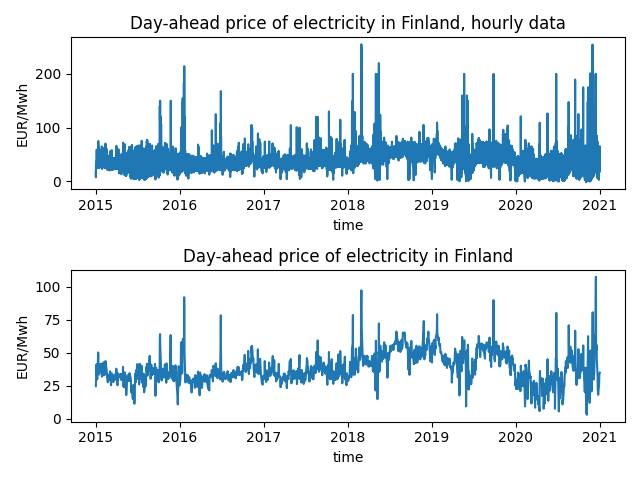

In [1]:
from IPython.display import Image
Image("./images/prices.png")

As can be seen from the picture above, there are clear hourly peaks that are flattened when aggregating the data to daily frequency. In the aggregated picture one can also observe yearly changes which can not be observed in the hourly picture.

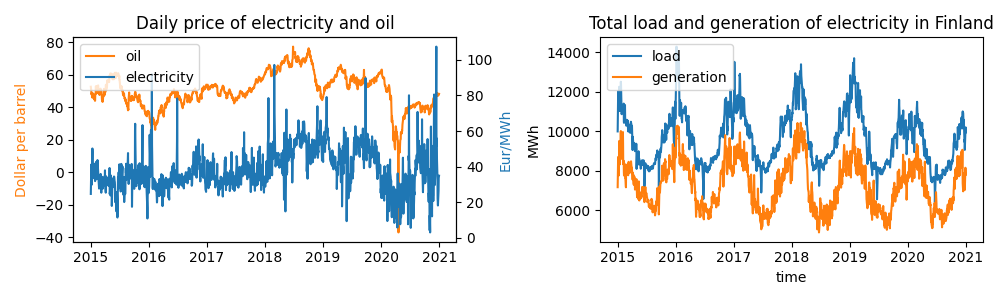

In [4]:
Image('./images/elec_and_oil_load_and_gen.png')

On the picture in the left one can notice that the price of oil and the price of electricity seem to be highly correlated but the price of electricity has higher volatility.

From the picture in the right, one can noticate that the generation and load of electricity are highly correlated. They both seem to have strong yearly trends with both the generation and the demand peaking in winter months. Since demand and supply are highly correlated, the peaks in demand aren't necessarily shown as peaks in prices.

In addition to these pictures, we also plotted the explanatory variables having variable in time t on the x axis and variable in time t+1 on the y axis. This helped as understand if the data is stationary and can be used in a time series model.

## Model: 

- Describe the model
- Why this model
- How well it works
- The shortcomings, would you do something differently this time?

We use Random forest regression with the following feature variables: Time of day, Day of Year, Natural gas price, Oil price, Electricity usage. These variables were concluded to have the largest impact on the energy price after EDA and testing combinations of different feature variables. We use the sklearn default settings for the Random forest regressor (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

We proposed and tested different options. We had an idea to predict the electricity prices with a SARIMA (Seasonal Autoregressive Integrated Moving Average) model, but we realized that implementing the model would be difficult and too expensive computationally, up to the point that we could not allocate enough memory for the fitting, since the electricity price data has multiple levels of seasonality (hourly and seasonal), which require advanced techniques to accurately capture. We ultimately chose Random forest regression, since it works well with non linear releationships between the features and the target, and thus works also well with seasonality in the data. It also is computationally efficient with larger datasets and is robust to outliers (which is good since electricity prices can sometimes spike for a short time). The biggest disadvantage of the random forest regressor is however, that it cannot extrapolate beoynd the training data, meaing that it can't give good predictions with extreme (uncommon in the training data) input values for the features, which is somewhat of an issue.

When training the model we use 85% of the data for training and leave 15% of the data for testing (our data has around 43000 data points). The model score (R-squared) for the testing data is around 0.9 (slight randomness comes from the random way we split the training and testing data).

In order to predict the electricity price for a certain point in time a time and date is given as input by the user. In the prediction we set the oil price and gas price as their respective averages for the year 2022, since we can not know the future prices, and including the the data from years before 2022 in the averages leads to unlikely estimates for the prices during the coming winter, since prices have risen significantly this year and are not expected by experts to return to a lower range during the next winter. The model is held back by this, since variability in oil- and natural gas prices impact the predicted results a fair amount. There also exists missing values in the data in general, which are problematic, since rarely for certain inputs the model can't give a prediction for values that would be missing from the training data. We could have fixed this with some sort of imputation, but that would negatively impact the accuracy in general. The estimated load is an average calculated from historical data, which should be fine, since electricity usage does not that much in the historical data.

All in all, the model prediction performs well when the input features are accurate and not too extreme, but the uncertainity of the feature values during the coming winter is ultimately what is holding the model back.

## Communication of results: Web application

- Short description of the application
- Why this form to communicate the results?

## Added value and conclusions: Great project!